# How to calculate the proportion of sand using a moving window

In [1]:
text = """top,base,number
24.22,24.17,20
24.02,23.38,19
22.97,22.91,18
22.67,22.62,17
21.23,21.17,16
19.85,19.8,15
17.9,17.5,14
17.17,15.5,13
15.18,14.96,12
14.65,13.93,11
13.4,13.05,10
11.94,11.87,9
10.17,10.11,8
7.54,7.49,7
6,5.95,6
5.3,5.25,5
4.91,3.04,4
2.92,2.6,3
2.22,2.17,2
1.9,1.75,1"""

In [2]:
text = '\n'.join(text.split()[:1] + list(reversed(text.split()[1:])))
text

'top,base,number\n1.9,1.75,1\n2.22,2.17,2\n2.92,2.6,3\n4.91,3.04,4\n5.3,5.25,5\n6,5.95,6\n7.54,7.49,7\n10.17,10.11,8\n11.94,11.87,9\n13.4,13.05,10\n14.65,13.93,11\n15.18,14.96,12\n17.17,15.5,13\n17.9,17.5,14\n19.85,19.8,15\n21.23,21.17,16\n22.67,22.62,17\n22.97,22.91,18\n24.02,23.38,19\n24.22,24.17,20'

You need the latest and greatest `striplog`, install like so:

    python -m pip install --upgrade https://github.com/agile-geoscience/welly/archive/develop.zip

In [3]:
import striplog

striplog.__version__

'0.8.9'

## Make a striplog

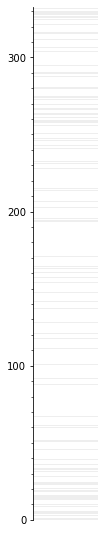

In [4]:
from striplog import Striplog, Component

s = Striplog.from_csv(filename='/Users/matt/Downloads/moving_sand_% - real_data (1).csv')

s.plot(aspect=5)

In [5]:
s[0]

Interval({'top': Position({'middle': 332.85, 'units': 'm'}), 'base': Position({'middle': 332.53, 'units': 'm'}), 'description': '', 'data': {'number': 1072.0}, 'components': []})

This is not a nice plot... it would normally be easy to make a nicer one, but there's something weird going on with the 'elevation' mode of striplog here. It's bug, I'll fix it asap.

## Make a sand flag log

In [6]:
start, stop, step = 0, 335, 0.01

L = s.to_log(start=start, stop=stop, step=step)

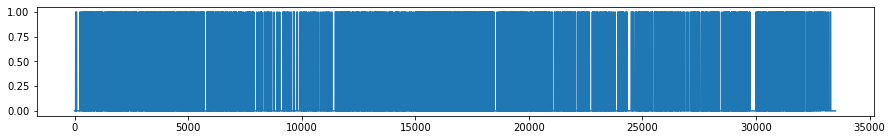

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 2))
plt.plot(L)

## Convolve with running window

Convolution with a boxcar filter computes the mean in a window.

(-5.0, 105.0)

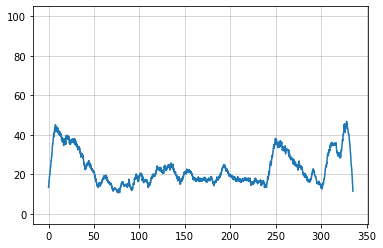

In [8]:
import numpy as np

window_length = 10

N = int(window_length / step)
boxcar = 100 * np.ones(N) / N

z = np.linspace(start, stop, L.size)
prop = np.convolve(L, boxcar, mode='same')

plt.plot(z, prop)
plt.grid(c='k', alpha=0.2)
plt.ylim(-5, 105)

## Write out as CSV

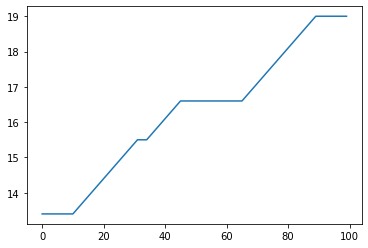

In [34]:
plt.plot(prop[:100])

In [28]:
np.stack([z, prop], axis=1).shape

(33501, 2)

In [41]:
z_prop = np.stack([z, prop], axis=1)
np.savetxt('prop.csv', z_prop, delimiter=',', header='elev,perc', comments='', fmt='%1.3f')

In [42]:
!head prop.csv

elev,perc
0.000,13.400
0.010,13.400
0.020,13.400
0.030,13.400
0.040,13.400
0.050,13.400
0.060,13.400
0.070,13.400
0.080,13.400


## Plot everything together

Text(0.5, 1.0, '% sand, 10 m')

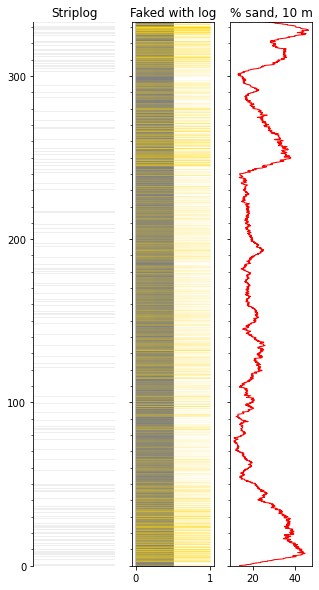

In [9]:
fig, ax = plt.subplots(figsize=(5, 10), ncols=3, sharey=True)

s.plot(ax=ax[0])
ax[0].set_title('Striplog')

# Fake a striplog.
ax[1].fill_betweenx(z, 0.5, 0, color='grey')
ax[1].fill_betweenx(z, L, 0, color='gold', lw=0)
ax[1].set_title('Faked with log')

ax[2].plot(prop, z, 'r', lw=1)
ax[2].set_title(f'% sand, {window_length} m')

In [10]:
for iv in s:
    iv.components = [Component(dict(lithology='sandstone'))]

([66.57999999999977],
 (Component({'lithology': 'sandstone'}),),
 <BarContainer object of 1 artists>)

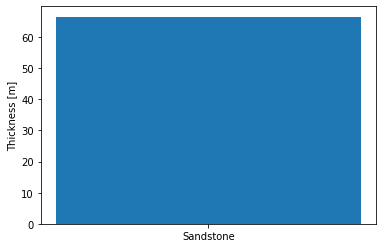

In [11]:
s.histogram()

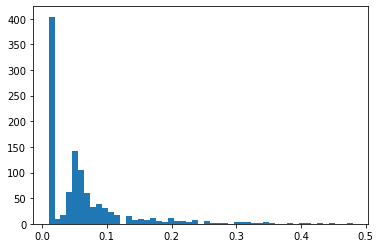

In [12]:
thicks = [iv.thickness for iv in s]

_ = plt.hist(thicks, bins=51)